# Le problème du tir

Dans ce notebook, nous allons déterminer le(s) bon(s) angle(s) de tir permettant d'atteindre une cible donné pour différentes valeurs du coefficient de frottement $\nu$.

Nous rappelons que la fonction $F$ donnée par
\begin{equation*}
    F(\theta) = d \tan\theta
    + \frac{g}{\nu v_0\cos\theta} d + \frac{g}{\nu^2}
    \ln \Bigl(
        1 - \frac{d \nu}{v_0\cos\theta}
    \Bigr)
\end{equation*}
permet d'obtenir ces angles qui sont les zéros de $F$.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from format import Multiple
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [18]:
# Définition des paramètres
g = 9.80665  # coefficient de gravité sur Terre
v0 = 1.e2    # norme de la vitesse initiale du tir

#### Question 1

> Implémentez la fonction `F(theta, d, nu)` qui prend en argument l'angle $\theta$ (un double ou un ndarray), la distance cible $d$ et le coefficient de frottement $\nu$. Veillez à ce que la fonction retourne la bonne valeur également pour $\nu=0$.

*Indication 1 : utilisez la commande `np.isscalar` pour traiter correctement les deux cas de `theta` un double ou un ndarray.*

*Indication 2 : utilisez la commande `np.where` pour traiter sans erreur les valeurs de `theta` pour lesquelles la fonction $F$ n'est pas définie. Vous pourrez alors affecter `-np.inf`.*

In [19]:
def F(theta, d, nu):
    """
    Fonction donnant la hauteur à l'abscisse d d'un tir d'angle theta
    avec un coefficient de frottement de nu
    
    Parameters
    ----------
    
    theta: double or ndarray
        le ou les angles de tir
        
    d: double
        la distance où l'on observe le tir
        
    nu: double
        coefficient de frottement
        
    Returns
    -------
    
    outF: double ou ndarray
        la hauteur observée
    """
    vtheta = np.array([theta]) if np.isscalar(theta) else theta
    
    a1 = d*np.tan(vtheta)
    a2 = v0*np.cos(vtheta)
    if nu == 0:  # pas de frottement
        outF = a1 - g/(2*a2**2)*d**2
    else:
        outF = np.zeros(vtheta.shape)
        indice_nan= np.where(1-d*nu/(v0*np.cos(theta))<=0) # indice ou on va agir
        outF[indice_nan] = -np.inf
        indice_ok= np.where(1-d*nu/(v0*np.cos(theta))>0)
        outF [indice_ok]= d* np.tan(vtheta[indice_ok]) \
        + (g*d)/(nu*v0*np.cos(vtheta[indice_ok])) \
        + (g/nu**2)*np.log(1 - d*nu/(v0 * np.cos(vtheta[indice_ok])))
    
    return outF[0] if np.isscalar(theta) else outF

In [20]:
F(np.array([np.pi/2,np.pi/4]),10,1)

array([     -inf, 9.8915812])

#### Question 2

> Implémentez la fonction `dichotomie(f, a, b, epsilon, verb=False)` qui prend en argument une fonction `f`, trois doubles `a`, `b` et `epsilon` et un booléen (argument optionnel) `verb`. La fonction devra retourner une valeur approchée d'un zéro de la fonction `f` entre `a` et `b` à `epsilon` près calculée par la méthode de la dichotomie. Si le booléen `verb` vaut `True`, la fonction pourra afficher des informations lors de la boucle afin de vérifier que le programme tourne bien (utilisé dans la phase de débuggage de la fonction).

*Indication : la fonction devra vérifier que $f(a)f(b)<0$, puis afficher un message d'erreur dans le cas contraire et retourner `None`.*

*Défis : essayez de minimiser le nombre d'appel à la fonction $f$. Vous pouvez n'utiliser qu'un seul appel par tour de boucle...*

In [68]:
def dichotomie(f, a, b, epsilon, verb=False):
    """
    Méthode de la dichotomie pour résoudre f(x) = 0 entre a et b
    à epsilon près
    
    Description
    -----------
    
    Si c = dichotomie(f, a, b, epsilon)
    alors la solution x de f(x)=0 est telle que |x-c| < epsilon/2
    
    Si f(a)*f(b) > 0 alors le programme affiche un message et retourne None
    
    Parameters
    ----------
    
    f: function
        la fonction dont on cherche le 0
        
    a: double
        la borne de gauche
        
    b: double
        la borne de droite
        
    epsilon: double
        la précision de la méthode
        
    verb: bool
        verbosity
        
    Returns
    -------
    
    c: double
        la racine cherchée
    """
    fa, fb = f(a), f(b)

    if fa * fb > 0:
        print("Error in dichotomie")
        return None
    compt = 0
    c = 0
    while abs(b-a) > epsilon:
        c = .5*(a+b)
        fc = f(c)
        if fc*fa >= 0:
            a, fa = c, fc
        if fc*fb >= 0:
            b, fb = c, fc
        compt += 1
        if verb:
            print(f"Dichotomie: it = {compt}, c={c}, b-a={b-a:10.3e}")
    return .5*(a+b)

In [69]:
dichotomie( lambda x: F(x, 1, 1),0, np.pi,0.001)

Error in dichotomie


#### Question 3

> Implémentez la fonction `zF(d, nu)` qui prend en argument deux doubles, la valeur cible `d` et le coefficient de frottement `nu` et qui retourne les deux zéros de la fonction $F$ (lorsqu'ils existent) en utilisant la méthode de la dichotomie programmée à la question précédente.

In [1]:
def zF(d, nu):
    """
    Fonction qui détermine les 2 zéros de la fonction F
    lorsqu'ils existent
    la méthode utilisée est la dichotomie
    
    Les deux zéros sont les angles qui permettent d'atteindre
    la cible à la distance d avec le coefficient de frottement nu
    
    Parameters
    ----------
    
    d: double
        la distance visée
        
    nu: double
        le coefficient de frottement
        
    Returns
    -------
    
    theta_1, theta_2: double, double
        les angles cherchés (None si pas trouvé)
    """
    epsilon = 1.e-3
    theta_1 = dichotomie(
        lambda x: F(x, d, nu),
        0, .25*np.pi, epsilon
    )
    theta_2 = dichotomie(
        lambda x: F(x, d, nu),
        .25*np.pi, .5*np.pi, epsilon
    )

    return theta_1, theta_2

#### Question 4

> Exécutez la cellule suivante qui devrait vous redonner la figure de la dernière page du cours.

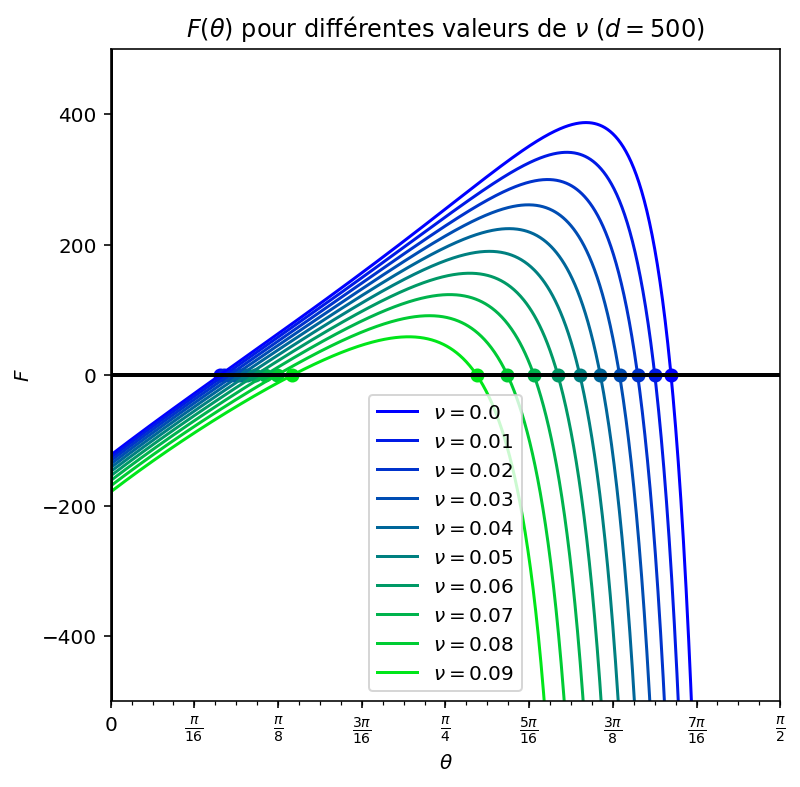

In [73]:
d = 500

vtheta = np.linspace(0, np.pi/2, 1025)
vtheta = vtheta[1:-1]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

for k, nu in enumerate([k*1.e-2 for k in range(10)]):
    vF = F(vtheta, d, nu)
    theta_1, theta_2 = zF(d, nu)

    ax.plot(
        vtheta, vF,
        color=(0, k/10, 1-k/10),
        label=r"$\nu={}$".format(nu)
    )
    ax.scatter([theta_1, theta_2], [0, 0], color=(0, k/10, 1-k/10))

major = Multiple(16, np.pi, r'\pi')
minor = Multiple(64, np.pi, r'\pi')
ax.axhline(0, color='black', lw=2)
ax.axvline(0, color='black', lw=2)
ax.xaxis.set_major_locator(major.locator())
ax.xaxis.set_minor_locator(minor.locator())
ax.xaxis.set_major_formatter(major.formatter())
ax.set_xlim([0, np.pi/2])
ax.set_ylim([-d, d])

ax.legend()

ax.set_title(r"$F(\theta)$ pour différentes valeurs de $\nu$ ($d={}$)".format(d))
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$F$");

#### Question 5

> Complétez la fonction `run_tir(theta, dt)` qui prend en argument l'angle `theta` et le pas de temps `dt` et qui retourne un double `px` l'abscisse de l'impact et deux ndarray `posx` et `posy` deux ndarray contenant les abscisses et les ordonnées des points de la trajectoire. Le calcul devra être fait en utilisant la méthode d'Euler explicite vue au TP précédent.

In [70]:
def run_tir(theta, dt):
    """
    calcul un tir avec un angle theta
    et retourne le point d'impact et toute la suite des positions
    Le schéma numérique de résolution de l'EDO
    est la méthode d'Euler explicite
    
    Parameters
    ----------
    
    theta: double
        l'angle d'incidence du tir
    
    dt: double
        pas de temps de la méthode
        
    Returns
    -------
    
    px: double
        position de l'impact
        
    posx, posy: ndarray, ndarray
        suite des positions
    """
    
    
    
    dtx = 0
    vx = v0*np.cos(theta)
    
    dty = 0
    vy = v0*np.sin(theta)
    
    posx, posy = [dtx], [dty]

    while dty>=0:
        
        dtx += dt*vx
        dty += dt*vy
        
        vx -= dt*nu*vx
        vy -= dt*(g +nu*vy)
        
        posx.append(dtx)
        posy.append(dty)
    
    return dtx, (posx, posy)

#### Question 6

Dans cette question, nous prendrons $\nu=10^{-3}$ et $d=750$.

> * Tracez sur une même figure la trajectoire obtenue ainsi que le point d'impact pour différentes valeurs de l'angle initial $\theta$
> * Calculez une valeur approchée des deux angles initiaux possibles permettant d'atteindre la valeur cible.
> * Ajoutez au graphique les trajectoires pour ces deux angles.
> * Vérifiez sur le graphique mais aussi en affichant les valeurs numériques obtenues que la cible est bien atteinte.

Vous pouvez essayer d'obtenir une figure comme celle ci

![](tir.pdf)

In [71]:
d = 750
nu = 1.e-3

Cible : d =  7.500e+02
distance pour theta = 0.416 :  7.500e+02
distance pour theta = 1.151 :  7.499e+02


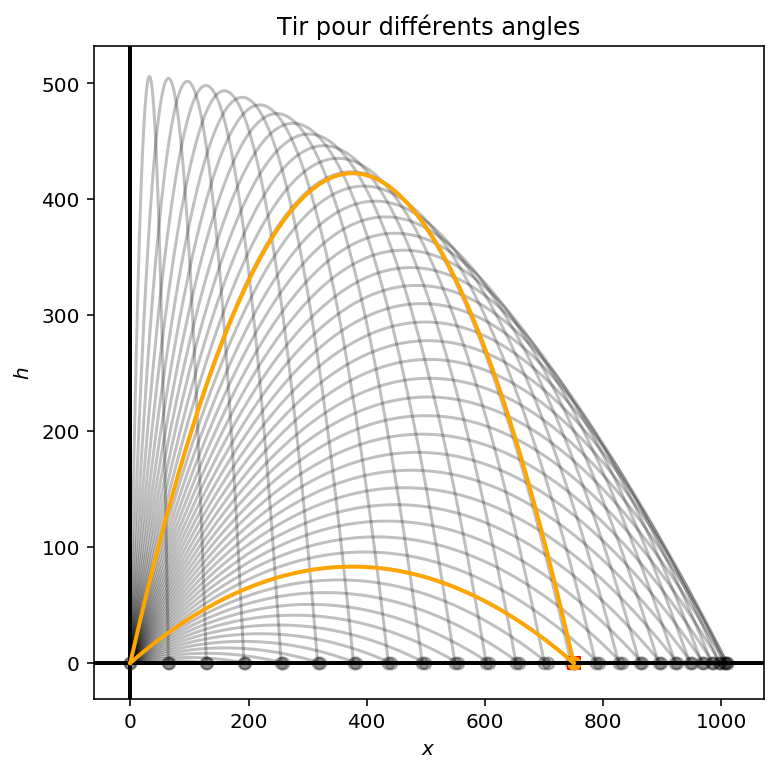

In [72]:
d = 750
nu = 1.e-3

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.set_title('Tir pour différents angles')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$h$')
ax.axhline(0, color='black', lw=2)
ax.axvline(0, color='black', lw=2)

for theta in np.linspace(0, .5*np.pi, 50):
    px, pos = run_tir(theta, 1.e-3)
    ax.plot(
        pos[0], pos[1],
        color='black', alpha=0.25
    )
    ax.scatter([px], [0], color='black', alpha=0.25)
    
print(f"Cible : d = {d:10.3e}")
ax.scatter([d], [0], marker='s', color='red')

for theta in zF(d, nu):
    da, pos = run_tir(theta, 1.e-3)
    ax.plot(
        pos[0], pos[1],
        color='orange', lw=2
    )
    ax.scatter([da], [0], color='orange')
    print(f"distance pour theta = {theta:5.3f} : {da:10.3e}")